# INSURANCE COST PREDICTION

Insurance cost prediction is a critical application of data science and machine learning aimed at estimating the premium or cost associated with insurance policies for individuals or groups. By leveraging historical data and advanced algorithms, insurance companies can accurately predict future costs, streamline operations, and offer competitive pricing to customers.

## Import Libraries

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings("ignore")

## Load Dataset

In [242]:
df=pd.read_csv('insurance.csv')

In [243]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Domain Analysis

 age: age of primary beneficiary 	sex: beneficiary’s gender - female or male ●	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24. 
●	children: Number of children covered by health insurance / Number of dependen 
●	smoker: Smoking or non-smok g
●	region: the beneficiary's residential area in the US; northeast, southeast, southwest, northw t.
●	charges: Individual medical costs billed by health insurance (to be prediiciary
urance
surance


## Basic Checks

In [244]:
df.shape

(1338, 7)

In [245]:
# THERE ARE 1338 ROWS AND 7 COLUMNS

In [246]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [247]:
df.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [248]:
# THERE ARE 6 INPUT FEATURES: AGE, SEX, BMI, CHILDREN, SMOKER, REGION
# THERE IS 1 TARGET COLUMN: CHARGES

In [249]:
# WE HAVE TO PREDICT CHARGES ACCORDING TO THE INPUT COLUMNS

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [251]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [252]:
# AS WE CAN SEE MINIMUM AGE IS 18 AND MAXIMUM AGE IS 64
# THE MINIMUM CHARGES ARE 1121 AND MAXIMUM CHARGES ARE 63770

In [253]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [254]:
# TARGET COLUMN IS IN FLOAT DATATYPE
# THERE ARE 3 COLUMNS WHICH ARE IN OBJECT DATATYPE: SEX, SMOKER, REGION SO WE HAVE TO CHANGE IN INT DATATYPE

In [255]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [256]:
df['children'].unique() 

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [257]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [258]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [259]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [260]:
# THERE ARE MAXIMUM PEOPLE FROM SOUTEAST WHOSE HAVE INSURANCE 

In [261]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [262]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

## EDA

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

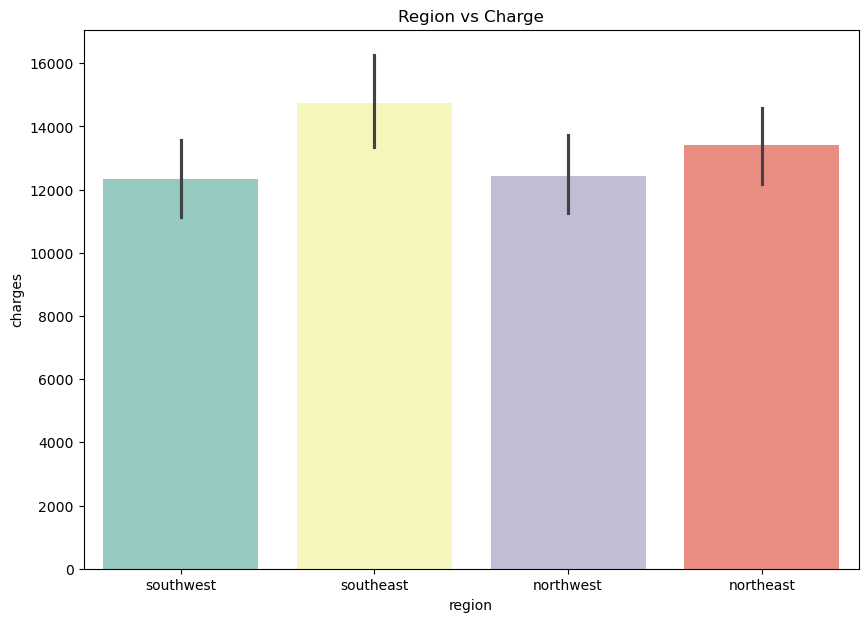

In [263]:

plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

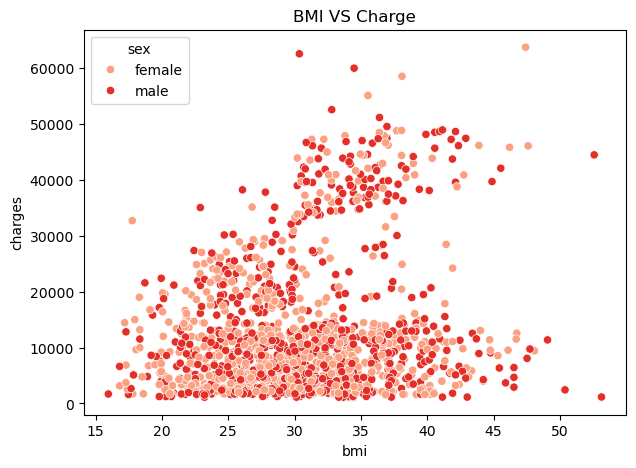

In [264]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

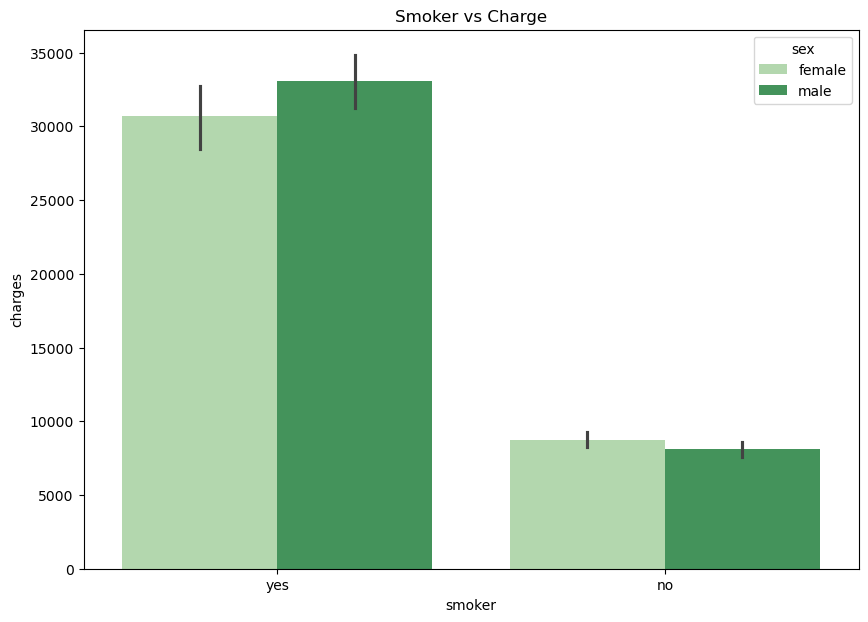

In [265]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Greens',hue='sex')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

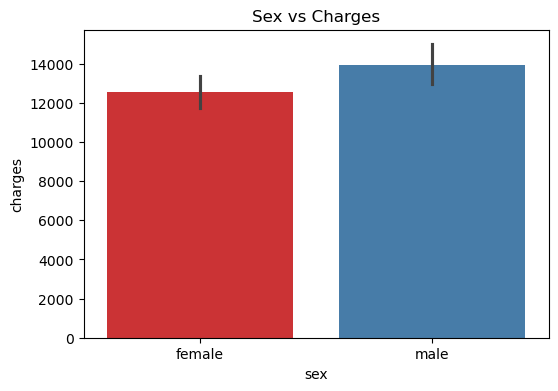

In [266]:

plt.figure(figsize=(6,4))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')

In [267]:
# charges are higher for males as compared to females

Text(0.5, 1.0, 'Age VS Charge')

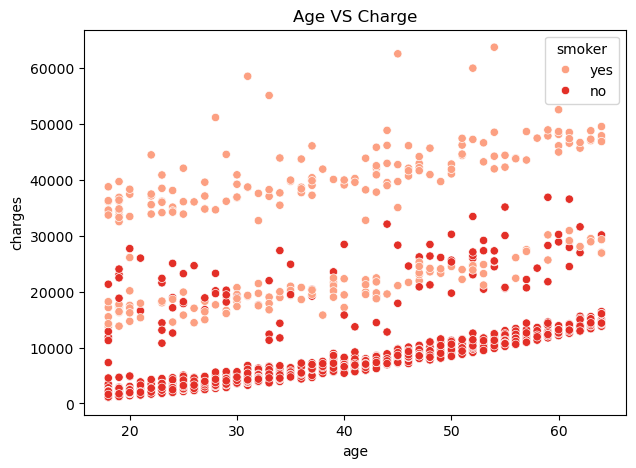

In [268]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age',y='charges',hue='smoker',data=df,palette='Reds')
plt.title('Age VS Charge')

In [269]:
# we can observe that as the age of a person increases premium prices goes up as well, as well as smokers have higher insurance cost

Text(0.5, 1.0, 'Age VS Charge')

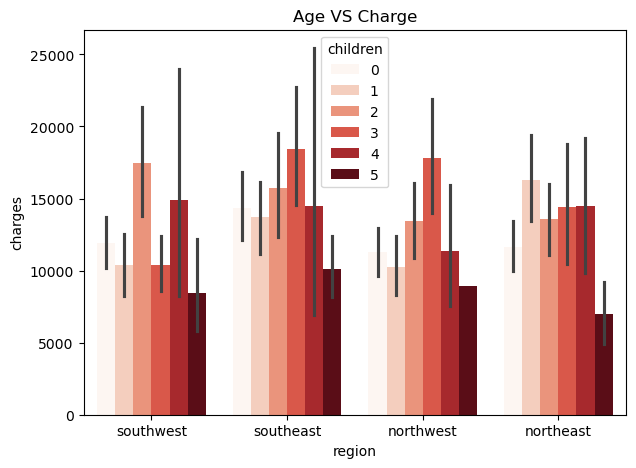

In [270]:
plt.figure(figsize=(7,5))
sns.barplot(x='region',y='charges',hue='children',data=df,palette='Reds')
plt.title('Age VS Charge')

## Data Preprocessing

In [271]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [272]:
# THERE IS NO NULL VALUES

In [273]:
df.duplicated().sum()

1

In [274]:
df.drop_duplicates(inplace=True)

In [275]:
df.duplicated().sum()

0

In [276]:
# THERE IS NO DUPLICATES NOW

### Converting categorical data into numerical

In [277]:
# THERE ARE 3 COLUMNS WHICH ARE IN OBJECT DATATYPE: SEX, SMOKER, REGION

In [278]:
conv = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}}

In [279]:
conv

{'sex': {'male': 0, 'female': 1},
 'smoker': {'no': 0, 'yes': 1},
 'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}}

In [280]:
data = df.copy()
data.replace(conv, inplace=True)

In [281]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


### Checking Outliers

<Axes: ylabel='age'>

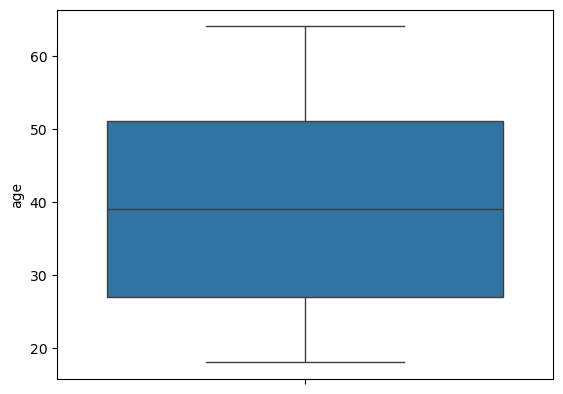

In [282]:
sns.boxplot(data['age'])

<Axes: ylabel='bmi'>

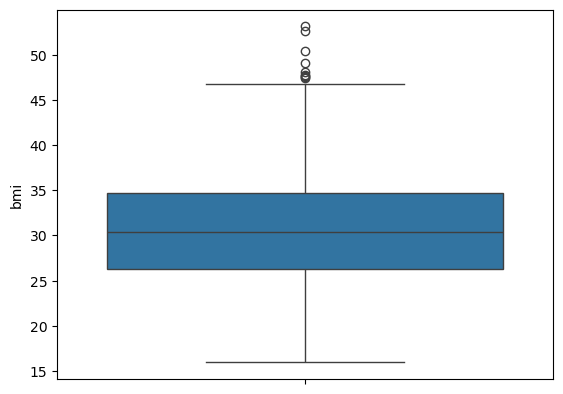

In [283]:
sns.boxplot(data['bmi'])

In [284]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


In [285]:
data['bmi']=np.where(data['bmi']>47.31,data['bmi'].median(),data['bmi'])

<Axes: xlabel='bmi'>

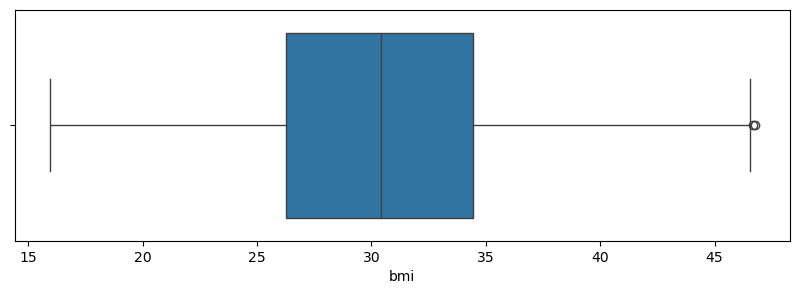

In [286]:
plt.figure(figsize=(10,3))
sns.boxplot(x=data['bmi'])

In [287]:
# Almost outliers have removed from BMI column

<Axes: ylabel='charges'>

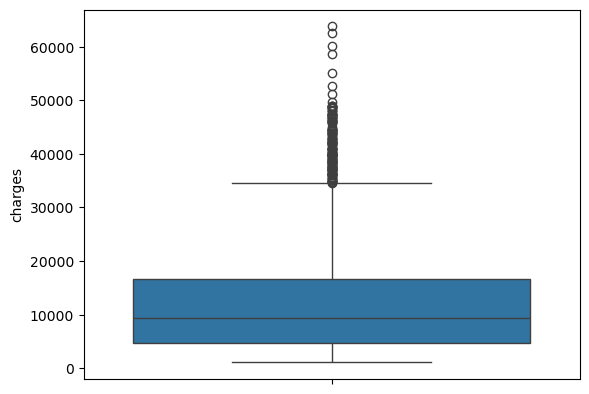

In [288]:
sns.boxplot(data['charges'])

**THERE ARE SOME OUTLIERS IN TARGET COLUMN BUT WE ARE NOT REMOVING THEM BECAUSE WE CAN NOT SAY THAT THE VALUES ARE OUTLIERS AS THERE MIGHT BE IN CASES IN WHICH CHARGER FOR MEDICAL INSURANCE IS MANDATORY OR LESS**!

## Feature Selection

In [289]:
# CHECK THE CORRELATION

In [290]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.114375,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.039781,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.114375,-0.039781,1.000000,0.017369,-0.002903,0.152670,0.190713
children,0.041536,-0.017848,0.017369,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,-0.002903,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.152670,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.190713,0.067389,0.787234,0.010767,1.000000


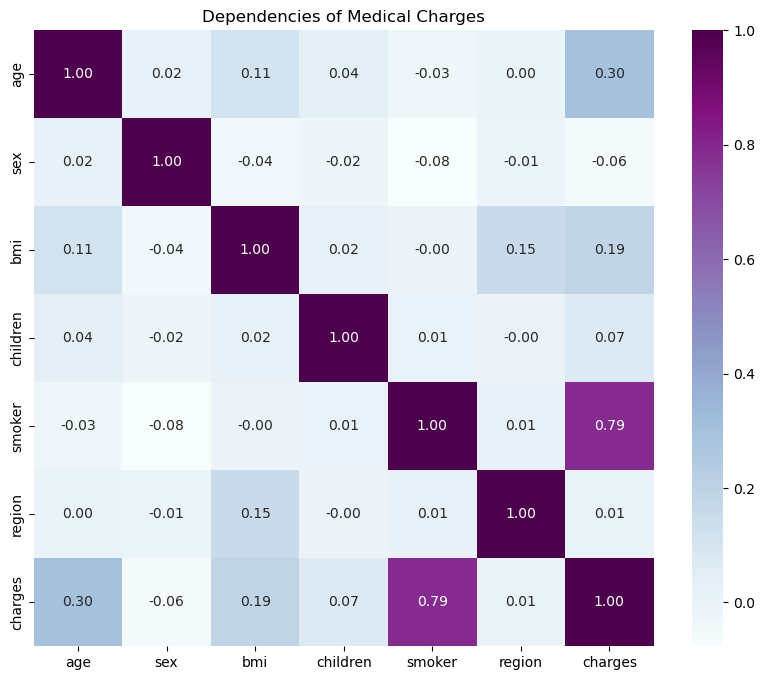

In [291]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

In [292]:
# SMOKER COLUMN ARE HIGHLY CORRELATED ,SO IT MEANS IT IS MOST IMPORTANT FEATURE THAT DETERMINE CHARGES

## Model Creation

In [293]:
x=data.drop(['charges'],axis=1)
y=data[['charges']]

In [294]:
x.head(4)

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0


In [295]:
y.head(4)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061


In [296]:
print("Shape of x=",x.shape)
print("Shape of y=",y.shape)

Shape of x= (1337, 6)
Shape of y= (1337, 1)


In [297]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [298]:
print("Shape of X_train=",x_train.shape)
print("Shape of X_test=",x_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of y_test=",y_test.shape)

Shape of X_train= (1069, 6)
Shape of X_test= (268, 6)
Shape of y_train= (1069, 1)
Shape of y_test= (268, 1)


In [299]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [300]:
x_train = pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [301]:
x_train

,age,sex,bmi,children,smoker,region
0,-1.157680,-0.971409,-1.009192,-0.907908,-0.500292,-0.464665
1,-1.300619,-0.971409,-0.798661,0.766904,-0.500292,-0.464665
2,0.914926,1.029432,1.209484,0.766904,-0.500292,-1.362905
3,1.701087,-0.971409,1.881991,-0.907908,-0.500292,0.433575
4,0.557580,1.029432,-0.652909,0.766904,-0.500292,-0.464665
...,...,...,...,...,...,...
1064,0.843457,1.029432,0.772227,0.766904,1.998831,-0.464665
1065,-0.871804,-0.971409,2.637177,0.766904,-0.500292,1.331815
1066,-1.372088,-0.971409,-1.437074,-0.070502,-0.500292,1.331815
1067,-0.085643,1.029432,-0.414249,1.604310,-0.500292,1.331815


In [302]:
x_test

,age,sex,bmi,children,smoker,region
0,0.700518,-0.971409,-1.349281,-0.907908,-0.500292,-0.464665
1,-0.728865,1.029432,-0.823379,2.441716,-0.500292,1.331815
2,0.843457,1.029432,1.015148,1.604310,-0.500292,-1.362905
3,-0.585927,-0.971409,0.675059,1.604310,1.998831,-1.362905
4,-0.585927,-0.971409,1.356942,0.766904,-0.500292,0.433575
...,...,...,...,...,...,...
263,1.772556,-0.971409,1.713225,-0.907908,-0.500292,0.433575
264,1.701087,1.029432,1.000658,-0.907908,-0.500292,0.433575
265,-1.229150,1.029432,0.707448,0.766904,-0.500292,-0.464665
266,1.558148,-0.971409,1.000658,-0.070502,1.998831,1.331815


## Model Building

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

### 1. LINEAR REGRESSION

In [304]:
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

**EVALUATION OF LINEAR REGRESSION**

In [305]:
cv_lr = cross_val_score(estimator = lrmodel, X = x, y = y, cv = 10)

y_pred_lr_train = lrmodel.predict(x_train)
r2_score_lr_train = r2_score(y_train, y_pred_lr_train)

y_pred_lr_test = lrmodel.predict(x_test)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)

print('CV Linear Regression : {0:.3f}'.format(cv_lr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))

CV Linear Regression : 0.743
R2_score (train) : 0.730
R2_score (test) : 0.799


**HYPERTUNING OF LINEAR REGRESSION**

In [306]:
cv_lr= cross_val_score(estimator = lrmodel, X = x, y = y, cv = 10)

y_pred_lr_train = lrmodel.predict(x_train)
r2score_lr_train = r2_score(y_train, y_pred_lr_train)

y_pred_lr_test = lrmodel.predict(x_test)
r2score_lr_test = r2_score(y_test, y_pred_lr_test)

r2score_rf_train = r2_score(y_train, y_pred_lr_train)
r2score_rf_test = r2_score(y_test, y_pred_lr_test)
cv_lr = cross_val_score(lrmodel,x,y,cv=5,).mean()

print('R2_score (train):',r2_score(y_train,y_pred_lr_train))
print('R2_score (test):',r2_score(y_test,y_pred_lr_test))
print('CV Linear Regression :',cross_val_score(lrmodel,x,y,cv=5,).mean())

R2_score (train): 0.7300191312385
R2_score (test): 0.798883827251401
CV Linear Regression : 0.7455964141061135


### 2. RANDOM FOREST REGRESSOR

In [307]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(x_train,y_train)
ypredtrain2=rfmodel.predict(x_train)
ypredtest2=rfmodel.predict(x_test)

**EVALUATION OF RANDOM FOREST REGRESSION**

In [308]:
print('R2_score (train):',r2_score(y_train,ypredtrain2))
print('R2_score (test):',r2_score(y_test,ypredtest2))
print('CV Random Forest Regressor :',cross_val_score(rfmodel,x,y,cv=5,).mean())

R2_score (train): 0.9739628498640922
R2_score (test): 0.8854391386738325
CV Random Forest Regressor : 0.8364916356297055


**HYPERTUNING OF RANDOM FOREST REGRESSION**

In [309]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'n_estimators': 150}


In [310]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=40)
rfmodel.fit(x_train,y_train)
ypredtrain2=rfmodel.predict(x_train)
ypredtest2=rfmodel.predict(x_test)
r2score_rf_train = r2_score(y_train, ypredtrain2)
r2score_rf_test = r2_score(y_test, ypredtest2)
cv_rf = cross_val_score(rfmodel,x,y,cv=5,).mean()
print('R2_score (train):',r2_score(y_train,ypredtrain2))
print('R2_score (test):',r2_score(y_test,ypredtest2))
print('CV Random Forest Regressor :',cross_val_score(rfmodel,x,y,cv=5,).mean())

R2_score (train): 0.9718845343149564
R2_score (test): 0.8870205119559652
CV Random Forest Regressor : 0.8351006684084361


### 3. GRADIENT BOOSTING REGRESSOR

In [311]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(x_train,y_train)
ypredtrain3=gbmodel.predict(x_train)
ypredtest3=gbmodel.predict(x_test)

**EVALUATION OF GRADIENT BOOSTING REGRESSION**

In [312]:
print('R2_score (train):',r2_score(y_train,ypredtrain3))
print('R2_score (test):',r2_score(y_test,ypredtest3))
print('CV Gradient Boosting Regressor :',cross_val_score(gbmodel,x,y,cv=5,).mean())

R2_score (train): 0.8917620361007066
R2_score (test): 0.8950794577052222
CV Gradient Boosting Regressor : 0.8535001246115138


**HYPERTUNING OF GRADIENT BOOSTING REGRESSION**

In [313]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.2, 'n_estimators': 20}


In [314]:
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(x_train,y_train)
ypredtrain3=gbmodel.predict(x_train)
ypredtest3=gbmodel.predict(x_test)
r2score_gb_train = r2_score(y_train, ypredtrain3)
r2score_gb_test = r2_score(y_test, ypredtest3)
cv_gb = cross_val_score(gbmodel,x,y,cv=5,).mean()
print('R2_score (train):',r2_score(y_train,ypredtrain3))
print('R2_score (test):',r2_score(y_test,ypredtest3))
print('CV Gradient Boosting Regressor :',cross_val_score(gbmodel,x,y,cv=5,).mean())

R2_score (train): 0.8682441588065786
R2_score (test): 0.8988822476737478
CV Gradient Boosting Regressor : 0.859389810318846


### 4. XGB REGRESSOR

In [315]:
xgmodel=XGBRegressor()
xgmodel.fit(x_train,y_train)
ypredtrain4=xgmodel.predict(x_train)
ypredtest4=xgmodel.predict(x_test)

**EVALUATION OF XGB REGRESSION**

In [316]:
print('R2_score (train):',r2_score(y_train,ypredtrain4))
print('R2_score (test):',r2_score(y_test,ypredtest4))
print('CV XGB Regressor :',cross_val_score(xgmodel,x,y,cv=5,).mean())

R2_score (train): 0.9952786060343344
R2_score (test): 0.859245723972482
CV XGB Regressor : 0.809099901218936


**HYPERTUNING OF XBG REGRESSION**

In [317]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}


In [318]:
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(x_train,y_train)
ypredtrain4=xgmodel.predict(x_train)
ypredtest4=xgmodel.predict(x_test)
r2score_xgb_train = r2_score(y_train, ypredtrain4)
r2score_xgb_test = r2_score(y_test, ypredtest4)
cv_xgb = cross_val_score(xgmodel,x,y,cv=5,).mean()
print('R2_score (train):',r2_score(y_train,ypredtrain4))
print('R2_score (test):',r2_score(y_test,ypredtest4))
print('CV XGB Regressor :',cross_val_score(xgmodel,x,y,cv=5,).mean())

R2_score (train): 0.8690195015478439
R2_score (test): 0.9010992961881331
CV XGB Regressor : 0.8606931771700694


## Conclusion

In [319]:
models = [('Linear Regression',r2score_lr_train,r2score_lr_test,cv_lr),
          ('Random Forest Regression',r2score_rf_train,r2score_rf_test,cv_rf),
          ('Gradient Boosting Regression',r2score_gb_train,r2score_gb_test,cv_gb),
          ('XGB Regression',r2score_xgb_train,r2score_xgb_test,cv_xgb)   
         ]

In [320]:
predict = pd.DataFrame(data = models, columns=['Model', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.730019,0.798884,0.745596
1,Random Forest Regression,0.971885,0.887021,0.835101
2,Gradient Boosting Regression,0.868244,0.898882,0.859390
3,XGB Regression,0.869020,0.901099,0.860693


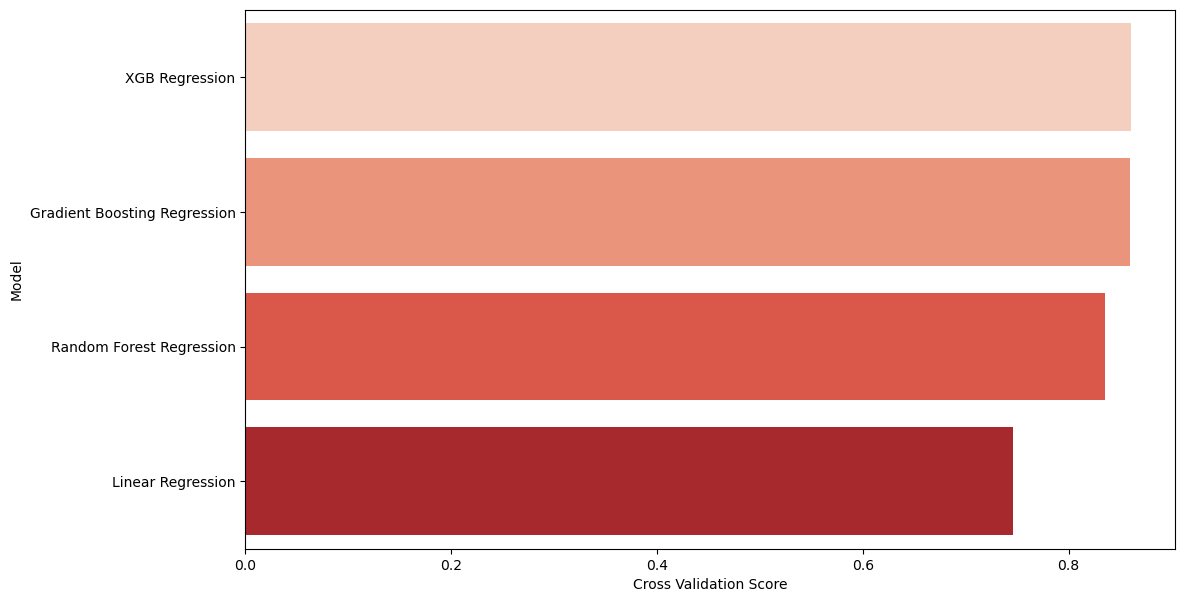

In [321]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

### AS WE CAN SEE XGBOOST REGRESSOR GIVES BEST SCORE OF PREDICTIVE MODEL

## Challenges Faced with Reasons

### Categorical Variables:

Features like Sex, Smoker and Region were categorical and required encoding for model training.
Reason: Machine learning algorithms work with numerical data, not categorical labels, Lack of standardization in data representation.

### Outliers in BMI
